# Linear Regression

### 1. Gather Data

In [40]:
import pandas as pd


# Path to your CSV file
csv_file = '../../data/test_sample.csv'
csv_file_bow = '../../data/bow_features.csv'
# Read CSV into a DataFrame
df = pd.read_csv(csv_file)

df_bow= pd.read_csv(csv_file_bow)
df

,Unnamed: 0,text,label,clean_text,no_stopwords,no_emoji,segmented,tokenized,lemmatized
0,0,Superb product! Definitely buying again.,positive,superb product definitely buying again,superbproductdefinitelybuying,superbproductdefinitelybuying,superb product definitely buying,"['superb', 'product', 'definitely', 'buying']",superb product definitely buy
1,1,Top service — totally worth the price!!,positive,top service — totally worth the price,topservice—totallyworthprice,topservice—totallyworthprice,top service totally worth price,"['top', 'service', 'totally', 'worth', 'price']",top service totally worth price
2,2,"Fine for the price, I guess. 🤷‍♂️",neutral,fine for the price i guess 🤷‍♂️,finepriceguess🤷‍♂️,finepriceguess,fine price guess,"['fine', 'price', 'guess']",fine price guess
3,3,"Could be better, could be worse. 🤷‍♂️",neutral,could be better could be worse 🤷‍♂️,couldbettercouldworse🤷‍♂️,couldbettercouldworse,could better could worse,"['could', 'better', 'could', 'worse']",could better could worse
4,4,Bad experience from beginning to end!!,negative,bad experience from beginning to end,badexperiencebeginningend,badexperiencebeginningend,bad experience beginning end,"['bad', 'experience', 'beginning', 'end']",bad experience begin end
...,...,...,...,...,...,...,...,...,...
995,995,Mediocre quality but fair price. 👏,neutral,mediocre quality but fair price 👏,mediocrequalityfairprice👏,mediocrequalityfairprice,mediocre quality fair price,"['mediocre', 'quality', 'fair', 'price']",mediocre quality fair price
996,996,Exceptional customer support. Highly satisfied...,positive,exceptional customer support highly satisfied,exceptionalcustomersupporthighlysatisfied,exceptionalcustomersupporthighlysatisfied,exceptional customer support highly satisfied,"['exceptional', 'customer', 'support', 'highly...",exceptional customer support highly satisfy
997,997,Refunded. Not worth the price!!! http://badsho...,negative,refunded not worth the price httpbadshopcom 🙄 ...,refundedworthpricehttpbadshopcom🙄fail,refundedworthpricehttpbadshopcomfail,refunded worth price http bad shop com fail,"['refunded', 'worth', 'price', 'http', 'bad', ...",refund worth price http bad shop com fail
998,998,Superb product! Definitely buying again. #awesome,positive,superb product definitely buying again awesome,superbproductdefinitelybuyingawesome,superbproductdefinitelybuyingawesome,superb product definitely buying awesome,"['superb', 'product', 'definitely', 'buying', ...",superb product definitely buy awesome


### 2. Sample Training Data

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Sample Training Data (x: house size, y: price)
x = np.array([1000, 1500, 2000, 2500, 3000])  # in square feet
y = np.array([200, 300, 400, 500, 600])       # in thousands $
print("houses in square feet :",x)
print("prices in thousands :",y)
m = len(x)  # number of training examples

houses in square feet : [1000 1500 2000 2500 3000]
prices in thousands : [200 300 400 500 600]


### 3. Create x as a matrix (n+1 features)

In [42]:
# Step 2: Add x0 = 1 to each input to create x as a matrix (n+1 features)
X = np.c_[np.ones(m), x]  # shape: (m, 2)
print("x0 , x1")
print(X)
# Step 3: Initialize theta as zero vector
theta = np.zeros(X.shape[1])   # [theta_0, theta_1]
print("theta value : ",theta)

x0 , x1
[[1.0e+00 1.0e+03]
 [1.0e+00 1.5e+03]
 [1.0e+00 2.0e+03]
 [1.0e+00 2.5e+03]
 [1.0e+00 3.0e+03]]
theta value :  [0. 0.]


### 4. Define hypothesis function

In [43]:
def h_theta(X, theta):
    return np.dot(X, theta)

### 5.Define cost function J(theta)

In [44]:
def compute_cost(X, y, theta):
    predictions = h_theta(X, theta)
    errors = predictions - y
    return (1 / (2 * m)) * np.dot(errors, errors)

### 6.Gradient Descent

In [45]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []
    print("Initial X sample:", X[:3])
    print("Initial y sample:", y[:3])
    print("Initial theta:", theta)
    for i in range(num_iters):
        error = h_theta(X, theta) - y
        gradient = (1 / m) * np.dot(X.T, error)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        print(f"Iteration {i}: Cost = {cost}, Theta = {theta}")
        if np.isnan(cost):  # safety check
            print("Cost became NaN, breaking.")
            break
        

    
    return theta, cost_history

### 7. Run and Plotting the data

Initial X sample: [[1.0e+00 1.0e+03]
 [1.0e+00 1.5e+03]
 [1.0e+00 2.0e+03]]
Initial y sample: [200 300 400]
Initial theta: [0. 0.]
Iteration 0: Cost = 182241972088408.0, Theta = [4.e+00 9.e+03]
Iteration 1: Cost = 3.690237376741361e+23, Theta = [-1.7999204e+05 -4.0498208e+08]
Iteration 2: Cost = 7.472401522352247e+32, Theta = [8.09946341e+09 1.82237922e+13]
Iteration 3: Cost = 1.5130946551887805e+42, Theta = [-3.64467826e+14 -8.20052588e+17]
Iteration 4: Cost = 3.063881710200384e+51, Theta = [1.64006909e+19 3.69015537e+22]
Iteration 5: Cost = 6.2040871679169396e+60, Theta = [-7.38014838e+23 -1.66053334e+27]
Iteration 6: Cost = 1.2562723116550827e+70, Theta = [3.32099362e+28 7.47223547e+31]
Iteration 7: Cost = 2.5438393728454063e+79, Theta = [-1.49441422e+33 -3.36243190e+36]
Iteration 8: Cost = 5.151047822038757e+88, Theta = [6.72471586e+37 1.51306103e+41]
Iteration 9: Cost = 1.0430412371222742e+98, Theta = [-3.02605549e+42 -6.80862468e+45]
Iteration 10: Cost = 2.112065466918856e+107, T

/tmp/ipykernel_5325/106351424.py:10: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradient


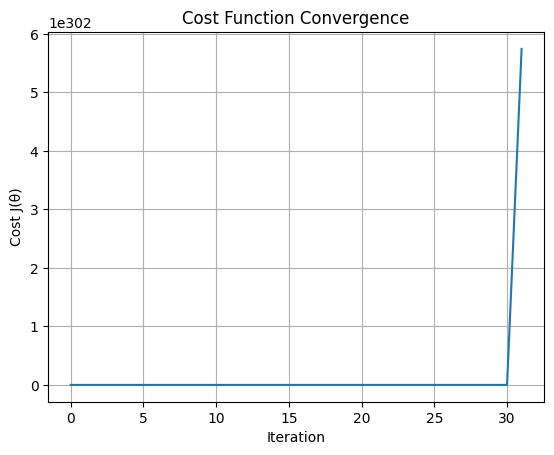

In [ ]:
alpha = 0.001  # learning rate
num_iters = 1000

theta_opt, cost_history = gradient_descent(X, y, theta, alpha, num_iters)

print("Optimized theta:", theta_opt)
print("Final cost:", cost_history[-1])
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost J(θ)")
plt.title("Cost Function Convergence")
plt.grid(True)
plt.show()

### 8. Plotting the Linear Regression Fit

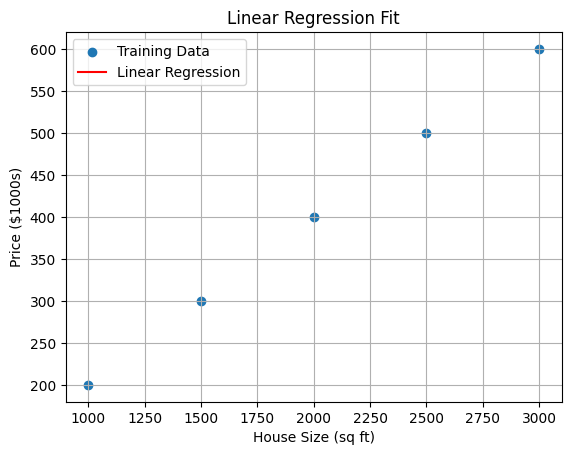

In [47]:
plt.scatter(x, y, label='Training Data')
plt.plot(x, h_theta(X, theta_opt), color='red', label='Linear Regression')
plt.xlabel("House Size (sq ft)")
plt.ylabel("Price ($1000s)")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()
